<a href="https://colab.research.google.com/github/j23-cs167/project-2-DrewSCovington/blob/main/Project2_Covington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Drew Covington

Proposed Points (out of 25): 25

https://nbviewer.org/github/j23-cs167/project-2-DrewSCovington/blob/main/Project2_Covington.ipynb

Follow this link to see the rendered version of my notebook to view the map (since it won't show in github).

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

---

The dataset I am using is miami housing from kaggle: https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset

The goal is to predict the price that houses sold at in miami (SALE_PRC) based on LATITUDE	LONGITUDE	PARCELNO	LND_SQFOOT	TOT_LVG_AREA	SPEC_FEAT_VAL	RAIL_DIST	OCEAN_DIST	WATER_DIST	CNTR_DIST	SUBCNTR_DI	HWY_DIST	age	avno60plus	month_sold	and structure_quality. 

There are about 14000 rows of data.

---

Explanation of variables from  https://www.kaggle.com/datasets/deepcontractor/miami-housing-dataset:

* PARCELNO: unique identifier for each property. About 1% appear multiple times.
* SALE_PRC: sale price
* LND_SQFOOT: land area (square feet)
* TOT_LVG_AREA: floor area (square feet)
* SPEC_FEAT_VAL: value of special features (e.g., swimming pools) ($)
* RAIL_DIST: distance to the nearest rail line (an indicator of noise) (feet)
* OCEAN_DIST: distance to the ocean (feet)
* WATER_DIST: distance to the nearest body of water (feet)
* CNTR_DIST: distance to the Miami central business district (feet)
* SUBCNTR_DI: distance to the nearest subcenter (feet)
* HWY_DIST: distance to the nearest highway (an indicator of noise) (feet)
* age: age of the structure
* avno60plus: dummy variable for airplane noise exceeding an acceptable level
* structure_quality: quality of the structure
* month_sold: sale month in 2016 (1 = jan)
* LATITUDE
* LONGITUDE

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Perceptron
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
%matplotlib inline
# load and prepare your data here

data = pd.read_csv('/content/drive/MyDrive/CS167 Jterm Data/miami-housing.csv')
data.head()


,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,25.891031,-80.160561,6.222800e+11,440000.0,9375,1753,0,2815.9,12811.4,347.6,42815.3,37742.2,15954.9,67,0,8,4
1,25.891324,-80.153968,6.222800e+11,349000.0,9375,1715,0,4359.1,10648.4,337.8,43504.9,37340.5,18125.0,63,0,9,4
2,25.891334,-80.153740,6.222800e+11,800000.0,9375,2276,49206,4412.9,10574.1,297.1,43530.4,37328.7,18200.5,61,0,2,4
3,25.891765,-80.152657,6.222800e+11,988000.0,12450,2058,10033,4585.0,10156.5,0.0,43797.5,37423.2,18514.4,63,0,9,4
4,25.891825,-80.154639,6.222800e+11,755000.0,12800,1684,16681,4063.4,10836.8,326.6,43599.7,37550.8,17903.4,42,0,7,4


In [4]:
# check for na
display(data.isna().any())

# check for nan
np.isnan(data).any()

LATITUDE             False
LONGITUDE            False
PARCELNO             False
SALE_PRC             False
LND_SQFOOT           False
TOT_LVG_AREA         False
SPEC_FEAT_VAL        False
RAIL_DIST            False
OCEAN_DIST           False
WATER_DIST           False
CNTR_DIST            False
SUBCNTR_DI           False
HWY_DIST             False
age                  False
avno60plus           False
month_sold           False
structure_quality    False
dtype: bool

LATITUDE             False
LONGITUDE            False
PARCELNO             False
SALE_PRC             False
LND_SQFOOT           False
TOT_LVG_AREA         False
SPEC_FEAT_VAL        False
RAIL_DIST            False
OCEAN_DIST           False
WATER_DIST           False
CNTR_DIST            False
SUBCNTR_DI           False
HWY_DIST             False
age                  False
avno60plus           False
month_sold           False
structure_quality    False
dtype: bool

I did not have to much data cleaning at all. There were no na or nan values, categorical variables, or binary variables. This dataset was easier to work with than I was anticipating, as every variable was numeric and an actual measure of something greater than or equal to 0. The only variable that was somewhat categorical was month_sold. Since no year is included, it isn't really a time-series. 

In [5]:
data.describe()

,LATITUDE,LONGITUDE,PARCELNO,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
count,13932.000000,13932.000000,1.393200e+04,1.393200e+04,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000,13932.000000
mean,25.728811,-80.327475,2.356496e+12,3.999419e+05,8620.879917,2058.044574,9562.493468,8348.548715,31690.993798,11960.285235,68490.327132,41115.047265,7723.770693,30.669251,0.014930,6.655828,3.513997
std,0.140633,0.089199,1.199290e+12,3.172147e+05,6070.088742,813.538535,13890.967782,6178.027333,17595.079468,11932.992369,32008.474808,22161.825935,6068.936108,21.153068,0.121276,3.301523,1.097444
min,25.434333,-80.542172,1.020010e+11,7.200000e+04,1248.000000,854.000000,0.000000,10.500000,236.100000,0.000000,3825.600000,1462.800000,90.200000,0.000000,0.000000,1.000000,1.000000
25%,25.620056,-80.403278,1.079160e+12,2.350000e+05,5400.000000,1470.000000,810.000000,3299.450000,18079.350000,2675.850000,42823.100000,23996.250000,2998.125000,14.000000,0.000000,4.000000,2.000000
50%,25.731810,-80.338911,3.040300e+12,3.100000e+05,7500.000000,1877.500000,2765.500000,7106.300000,28541.750000,6922.600000,65852.400000,41109.900000,6159.750000,26.000000,0.000000,7.000000,4.000000
75%,25.852269,-80.258019,3.060170e+12,4.280000e+05,9126.250000,2471.000000,12352.250000,12102.600000,44310.650000,19200.000000,89358.325000,53949.375000,10854.200000,46.000000,0.000000,9.000000,4.000000
max,25.974382,-80.119746,3.660170e+12,2.650000e+06,57064.000000,6287.000000,175020.000000,29621.500000,75744.900000,50399.800000,159976.500000,110553.800000,48167.300000,96.000000,1.000000,12.000000,5.000000


Split data into training and testing sets:

In [6]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
predictors = data.columns.drop(['SALE_PRC', 'PARCELNO'])
target = 'SALE_PRC'

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state = 86)

Normalize the data:

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data)

train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

# 3. Research

Put your code and your experiments here.

Correlation matrix of all features:

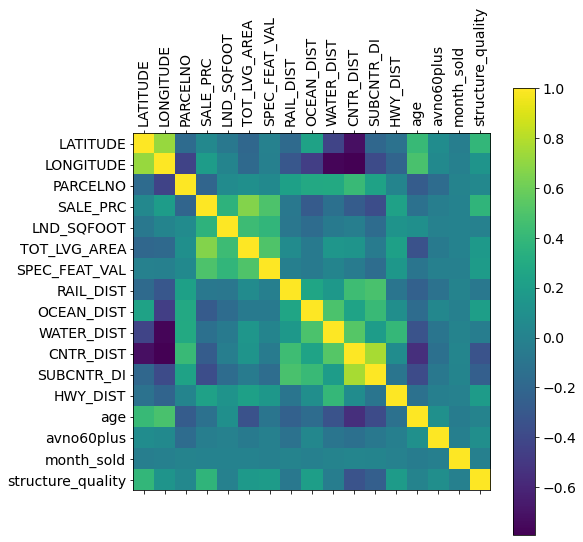

In [8]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

# correlation matrix
f = plt.figure(figsize=(8, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

---

There are a lot of variables that have a moderately strong or strong correlation with each other, so I might have to use Principal Component Analysis to reduce the dimentionality of the data.

---

Histograms of each feature:

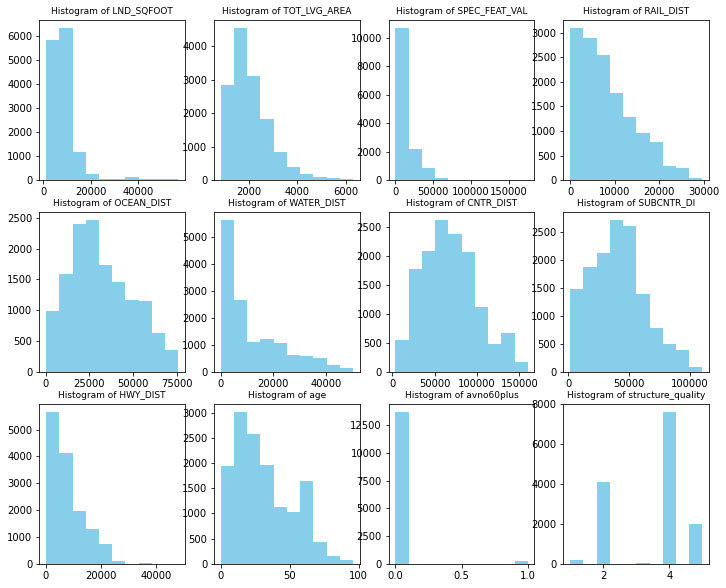

In [9]:
plot_cols = data.columns.drop(['SALE_PRC', 'PARCELNO', 'LONGITUDE', 'LATITUDE', 'month_sold'])

plt.figure(figsize = (12, 10))
for i in range(12): 
  plt.subplot(3, 4, i + 1)
  plt.hist(data[plot_cols[i]], color = 'skyblue')
  plt.title('Histogram of ' + plot_cols[i], fontsize = 9)

Dummy Regressor Model:

In [10]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy = "median")
dummy_reg.fit(train_data, train_sln)

dummy_pred = dummy_reg.predict(test_data)

print("Dummy Regressor r2:", r2_score(test_sln, dummy_pred), '\nMSE:', mean_squared_error(test_sln, dummy_pred))

Dummy Regressor r2: -0.08537695775816667 
MSE: 104302490805.00754


Random Forest Regressor:

In [11]:

rf = RandomForestRegressor(random_state = 86)
rf.fit(train_data, train_sln)
predictions = rf.predict(test_data)

print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.9135764868164092 
MSE:  8305121667.394361


The Random Forest Regressor performed very well. The r2 is .91. The MSE appears to be large, but sales price has a spread of hundreds of thousands, so this MSE is relatively low.

Feature importances derived from Random Forest Regressor:

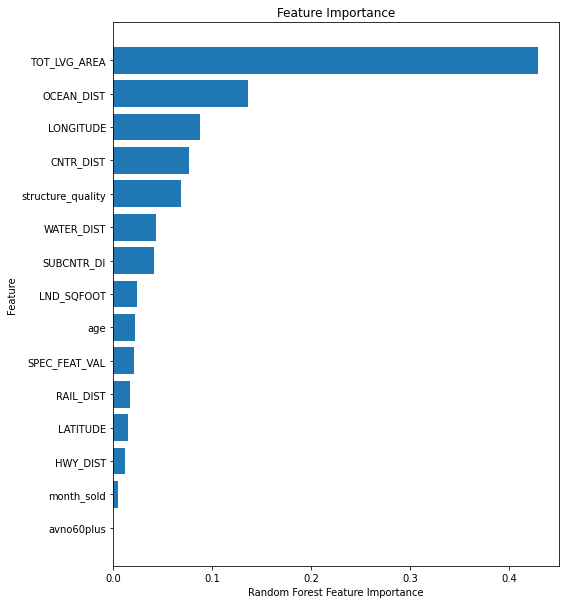

In [12]:
# How to order indices for feature importance chart:
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python
import numpy as np
importances = rf.feature_importances_
ordered_indices = np.argsort(importances)

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,importances[ordered_indices],height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,[predictors[i] for i in ordered_indices]) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

Map out miami housing sales and include the square footage of the house (the variable with the #1 feature importance):
---

In [13]:
from tensorflow.python.training.server_lib import device_filters_pb2
import folium # mapping
import chardet #encoding
from folium.plugins import HeatMap
import matplotlib.animation as animation

# code to plot on map: https://www.kaggle.com/code/nadiate/eda-folium-pydeck-housing-prediction
color = "grey"
df2 = data[['LATITUDE', 'LONGITUDE', 'TOT_LVG_AREA', 'SALE_PRC']].head(300)
miami_map = folium.Map(location=[25.891031, -80.160561],
                tiles="OpenStreetMap", zoom_start=14)

for i in range(1, len(df2)):

  if df2.iloc[i].SALE_PRC < np.quantile(df2.SALE_PRC, .33):
    col = "lightblue"
  elif df2.iloc[i].SALE_PRC < np.quantile(df2.SALE_PRC, .66):
    col = "blue"
  else:
    col = "darkblue"

  folium.Marker(location = [df2.iloc[i].LATITUDE, df2.iloc[i].LONGITUDE],
                tooltip = "click for price",
                popup = df2.loc[i, ['TOT_LVG_AREA', 'SALE_PRC']],
                icon = folium.Icon(color = col, icon = 'university', prefix = 'fa')).add_to(miami_map)

# Code to add title to the map: https://stackoverflow.com/questions/61928013/adding-a-title-or-text-to-a-folium-map
loc = 'Miami Housing Sales Prices'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   



miami_map.get_root().html.add_child(folium.Element(title_html))

miami_map.save('map-with-title.html')                
miami_map

Perceptron Model:
---

In [14]:
p = Perceptron(max_iter = 1000, random_state = 86)

p.fit(train_data_norm, train_sln)
predictions = p.predict(test_data_norm)

print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.37980138496913785 
MSE:  59599809890.1489


Perceptron model did not perform well. I will try a multilayer perceptron model and see if that is a better model.

Multilayer Perceptron
---

In [15]:
mlp = MLPRegressor(max_iter = 1200, random_state = 86)
mlp.fit(train_data, train_sln)
predictions = mlp.predict(test_data)
print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.8743011726626208 
MSE:  12079398488.095074


The tuned multilayer perceptron model peformed much better than the perceptron model. The r2 improved from .26 to .87.

Next, I'll try stochastic gradient descent.

Stochastic Gradient Descent
---

In [16]:
sgd = SGDRegressor(max_iter = 1000, penalty = 'l2', random_state = 86)
sgd.fit(train_data_norm, train_sln)
predictions = sgd.predict(test_data_norm)
print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.6989420030945244 
MSE:  28931053611.886105


The sgd model did not perform as well as the mlp model, but it is still a decent model. Next, I will repeat multilayer perceptron training, but I will perform a prinicipal component analysis to reduce the dimensionality first. 

MLP after PCA
---

In [17]:
pca = PCA(n_components = 13)
pca.fit(train_data)

train_transformed = pca.transform(train_data)
test_transformed = pca.transform(test_data)

mlp = MLPRegressor(max_iter = 1200, random_state = 86)
mlp.fit(train_transformed, train_sln)
predictions = mlp.predict(test_transformed)
print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.8903074690422436 
MSE:  10541226363.632286


Performing PCA before training the MLP model helped the MLP model improve its r-squared value from .87 to .89.

I will see if the PCA improves the random forest model at all.

RF after PCA
---

In [18]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 86)
rf.fit(train_data, train_sln)
predictions = rf.predict(test_data)

print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.9137955553919437 
MSE:  8284069628.356659


The random forest model did not really improve with PCA, but it is still the best model so far with an r-squared of .914.

Decision Tree
---

In [19]:
dt = DecisionTreeRegressor(min_samples_split = 29, random_state = 86)
dt.fit(train_data, train_sln)
predictions = dt.predict(test_data)

print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.8324686466940967 
MSE:  16099418098.78815


In [20]:
dt = DecisionTreeRegressor(min_samples_split = 29, random_state = 86)
dt.fit(train_transformed, train_sln)
predictions = dt.predict(test_transformed)

print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.7741844161669651 
MSE:  21700412642.830776


The tuned decision tree model peformed better without PCA.

I will try a tuned, weighted knn model.

Tuned Weighted KNN
---

In [21]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knn.fit(train_data_norm, train_sln)
predictions = knn.predict(test_data_norm)
print("r2: ", r2_score(test_sln, predictions), "\nMSE: ", mean_squared_error(test_sln, predictions))

r2:  0.887453965887924 
MSE:  10815442141.28268


The tuned knn model is the third best model behind Random Forest and MLP with PCA.

Finally, I will use keras to build a sequential artificial neural network.

Sequential Artificial Neural Network
---

In [22]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.7 MB/s eta 0:00:00


In [23]:
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

from tensorflow_addons.metrics import RSquare

n_features = train_data.shape[1]

model = Sequential(name = 'housing')

model.add(Dense(1024, input_dim = n_features, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

#model.compile(loss='mean_squared_error',
 #             optimizer='sgd', 
  #            metrics= RSquare())
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = RSquare())

model.summary()

Model: "housing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              16384     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 541,697
Trainable params: 541,697
Non-trainable params: 0
_________________________________________________________________


In [24]:
# train the model
history = model.fit(train_data_norm, train_sln, epochs=100, validation_split=0.1, batch_size=15, verbose=1)

print("----"*30)

# cross-validation; make predictions and get error
test_mse_score, test_r2_score = model.evaluate(test_data_norm, test_sln)
print('MSE:', test_mse_score)
print('r2:', test_r2_score)

Epoch 1/100
669/669 [==============================] - 6s 4ms/step - loss: 151541727232.0000 - r_square: -0.4988 - val_loss: 35269079040.0000 - val_r_square: 0.6718
Epoch 2/100
669/669 [==============================] - 4s 5ms/step - loss: 29159604224.0000 - r_square: 0.7116 - val_loss: 26280441856.0000 - val_r_square: 0.7555
Epoch 3/100
669/669 [==============================] - 4s 6ms/step - loss: 24539934720.0000 - r_square: 0.7573 - val_loss: 23457904640.0000 - val_r_square: 0.7817
Epoch 4/100
669/669 [==============================] - 4s 6ms/step - loss: 22530621440.0000 - r_square: 0.7772 - val_loss: 21986301952.0000 - val_r_square: 0.7954
Epoch 5/100
669/669 [==============================] - 4s 5ms/step - loss: 21352501248.0000 - r_square: 0.7888 - val_loss: 21033113600.0000 - val_r_square: 0.8043
Epoch 6/100
669/669 [==============================] - 5s 8ms/step - loss: 20567003136.0000 - r_square: 0.7966 - val_loss: 20294950912.0000 - val_r_square: 0.8112
Epoch 7/100
669/669 

The r-squared value was .88, which is one of the better models so far. I will tune the model further. On the graph below you can see that the training r-squared value and validation r-squared value both improved as the number of epochs increased; however, the increase was slow.

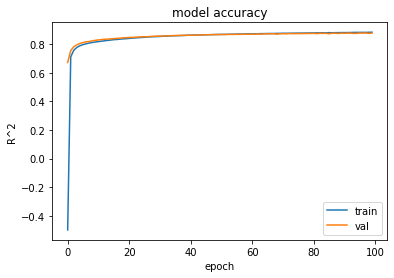

In [25]:
plt.plot(history.history['r_square'])
plt.plot(history.history['val_r_square'])
plt.title('model accuracy')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

Here is the tuned sequential artificial neural network:

In [26]:
n_features = train_data.shape[1]

modelt = Sequential(name = 'housing')

modelt.add(Dense(100, input_dim = n_features, activation = 'relu'))
modelt.add(Dense(100, activation = 'relu'))
modelt.add(Dense(100, activation = 'relu'))
modelt.add(Dense(100, activation = 'relu'))
modelt.add(Dense(100, activation = 'relu'))
modelt.add(Dense(100, activation = 'relu'))
modelt.add(Dense(100, activation = 'relu'))
modelt.add(Dense(1, activation = 'linear'))

modelt.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics= RSquare())
#modelt.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = RSquare())

modelt.summary()

Model: "housing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1600      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 100)               1010

In [27]:
# train the model
history = modelt.fit(train_data_norm, train_sln, epochs=50, validation_split=0.1, batch_size=15, verbose=1)

print("----"*30)

# cross-validation; make predictions and get error
test_mse_score, test_r2_score = modelt.evaluate(test_data_norm, test_sln)
print('MSE:', test_mse_score)
print('r2:', test_r2_score)

Epoch 1/50
669/669 [==============================] - 3s 4ms/step - loss: 49802162176.0000 - r_square: 0.5075 - val_loss: 18448232448.0000 - val_r_square: 0.8283
Epoch 2/50
669/669 [==============================] - 2s 3ms/step - loss: 18046349312.0000 - r_square: 0.8215 - val_loss: 16509288448.0000 - val_r_square: 0.8464
Epoch 3/50
669/669 [==============================] - 2s 3ms/step - loss: 16144621568.0000 - r_square: 0.8403 - val_loss: 14516203520.0000 - val_r_square: 0.8649
Epoch 4/50
669/669 [==============================] - 2s 3ms/step - loss: 14580773888.0000 - r_square: 0.8558 - val_loss: 13628669952.0000 - val_r_square: 0.8732
Epoch 5/50
669/669 [==============================] - 2s 3ms/step - loss: 13461825536.0000 - r_square: 0.8669 - val_loss: 12713542656.0000 - val_r_square: 0.8817
Epoch 6/50
669/669 [==============================] - 2s 3ms/step - loss: 12578747392.0000 - r_square: 0.8756 - val_loss: 12274970624.0000 - val_r_square: 0.8858
Epoch 7/50
669/669 [========

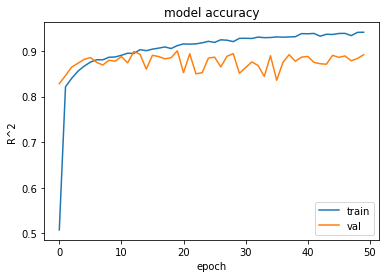

In [28]:
plt.plot(history.history['r_square'])
plt.plot(history.history['val_r_square'])
plt.title('model accuracy')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

The tuned artificial neural network ended up being the second best model after Tuned Random Forest. They both had an r2 of about .93, which is very strong.

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

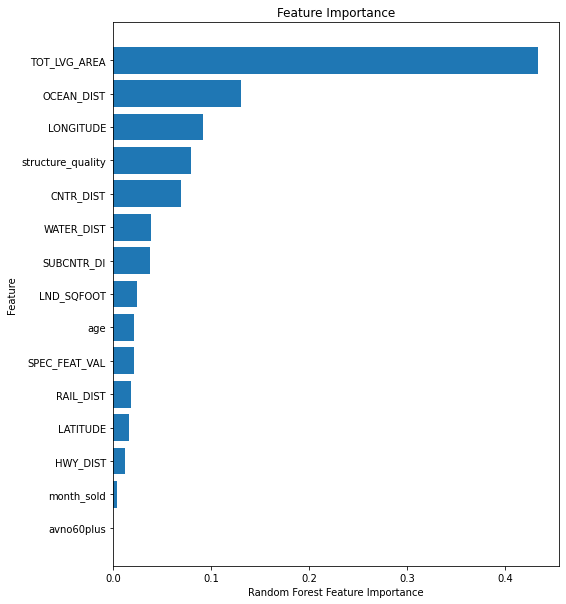

Random Forest Feature Importances show that
* Total Living Area 
* Distance to the OceanLongitude
* Structure Quality
* Distance to City Center 

have the highest importance. 

Model Performances
---

| Model                                 | Tuned? | R-squared |
|---------------------------------------|--------|-----------|
| Random Forest                         | X      | 0.913576  |
| Sequential Artificial Neural Network  | X      | 0.913213  |
| Multilayer Perceptron after PCA       | X      | 0.890307  |
| Weighted K-Nearest Neighbors          | X      | 0.887454  |
| Multilayer Perceptron                 | X      | 0.874301  |
| Decision Tree                         | X      | 0.832468  |
| Stochastic Gradient Descent           | X      | 0.7018995 |
| Perceptron                            | X      | 0.260054  |
| Dummy Regressor                       |        | -0.085376 |

Random forest, Sequential Artificial Neural Network from Keras, and Multilayer Perceptron Regression models performed the best. 

If people were not sure how to valuate their house in Miami when selling, I would recommend using one of these models to predict the value of the home. People that are shopping for houses could also compare the predicted value of a house with the list price to see if they are getting a fair price. 

The feature importances also tell us what is potentially important to people when buying a home. For people looking to build new homes or buy and sell, it could help to consider these features first to maximise the potential value.

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

My biggest challenges were tuning the models. I had to read all of the model documentation again and tweak parameters until I found each model's best r-sqared score.